# Convolutional Neural Networks for MNIST

## Prepare the Data

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras # Note that we are using tf.keras, not just keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.optimizers import SGD

In [2]:
# Load the train and test data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28)


In [3]:
# Determine the image shape
from tensorflow.keras import backend as K

img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)

print(shape_ord)  # Height, Width, and Depth of input image data

(28, 28, 1)


In [4]:
# Reshape the data

print(X_train.shape)
print(X_test.shape)

X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
# Set data to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Rescale data from 0-255 to 0-1
print(f'Max value: {np.amax(X_train)}') # lets convert the pixel data to a proportion between zero and 1
X_train /= 255 # /= takes X_train and divides by 255
X_test /= 255  # /= takes X_test and divides by 255
print(f'Rescaled max value: {np.amax(X_train)}')

Max value: 255.0
Rescaled max value: 1.0


In [6]:
# One-hot encode the classes
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print(y_train.shape)

(60000, 10)


## Build a Simple CNN

In [7]:
# Set up convolutional layer with 32 filters that are 3 by 3

nb_epoch = 5  # kept very low! Only increase if using GPUs
batch_size = 64
nb_filters = 32 # number of convolutional filters to use
nb_conv = 3 # convolution kernel/filter size (3 by 3)
nb_pool = 2 # size of pooling area for max pooling (2 by 2)

# Vanilla SGD to speed up optimization for example
sgd = SGD(learning_rate=0.1)

In [8]:
# Build the model

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='valid', # could also add strides=2, default is 1
                 input_shape=(28,28,1))) # the very first layer **must** always specify the input_shape
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │         216,330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 216,650 (846.29 KB)

 Trainable params: 216,650 (846.29 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Fit the model
hist = model.fit(X_train, y_train, batch_size=batch_size,
                 epochs=nb_epoch, verbose=1,
                 validation_split=.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8336 - loss: 0.5549 - val_accuracy: 0.9482 - val_loss: 0.1922
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9517 - loss: 0.1740 - val_accuracy: 0.9643 - val_loss: 0.1333
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9690 - loss: 0.1123 - val_accuracy: 0.9697 - val_loss: 0.1080
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9767 - loss: 0.0792 - val_accuracy: 0.9768 - val_loss: 0.0855
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9816 - loss: 0.0671 - val_accuracy: 0.9745 - val_loss: 0.0871


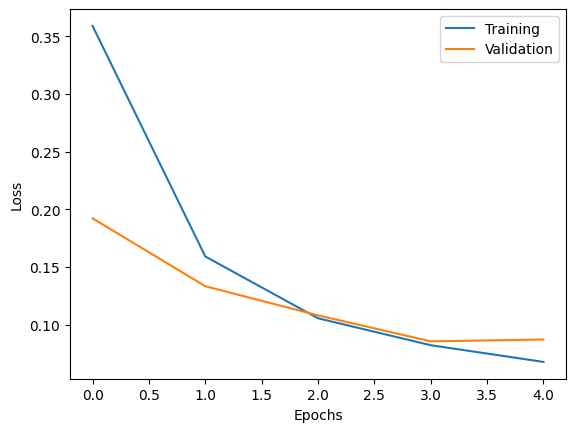

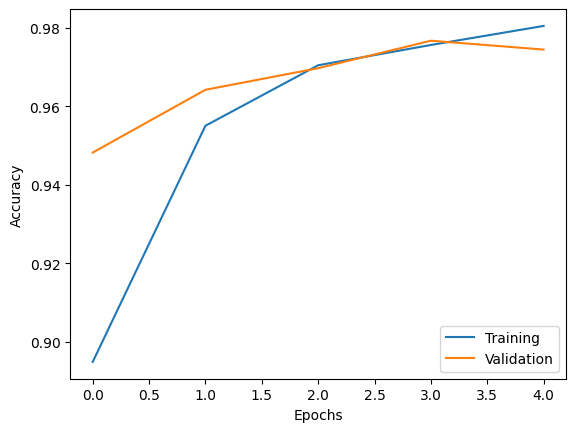

In [10]:
# Plot loss and accuracy at each epoch
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Training', 'Validation'], loc='lower right')

In [11]:
# Evaluate the model on the test data

print('Available Metrics in Model: {}'.format(model.metrics_names))
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Available Metrics in Model: ['loss', 'compile_metrics']
Test Loss: 0.07577192038297653
Test Accuracy: 0.9761000275611877


In [12]:
# Add more dense layers

model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=batch_size,
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7874 - loss: 0.8608 - val_accuracy: 0.9272 - val_loss: 0.2529
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9289 - loss: 0.2453 - val_accuracy: 0.9421 - val_loss: 0.1976
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9440 - loss: 0.1942 - val_accuracy: 0.9521 - val_loss: 0.1612
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9560 - loss: 0.1514 - val_accuracy: 0.9600 - val_loss: 0.1359
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9629 - loss: 0.1285 - val_accuracy: 0.9634 - val_loss: 0.1215
Test Loss: 0.12148963660001755
Test Accuracy: 0.9634000062942505


In [13]:
# Add more convolution layers and max pooling

model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=batch_size,
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6205 - loss: 1.3509 - val_accuracy: 0.9252 - val_loss: 0.2590
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9251 - loss: 0.2487 - val_accuracy: 0.9308 - val_loss: 0.2166
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9497 - loss: 0.1668 - val_accuracy: 0.9618 - val_loss: 0.1246
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9601 - loss: 0.1317 - val_accuracy: 0.9655 - val_loss: 0.1096
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9673 - loss: 0.1082 - val_accuracy: 0.9727 - val_loss: 0.0880
Test Loss: 0.08796167373657227
Test Accuracy: 0.9726999998092651


---

## Additional helpful code

In [14]:
# Time how long it takes to build the model and test it

def build_model():
    """"""
    model = Sequential()
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                     padding='valid',
                     input_shape=shape_ord))
    model.add(Activation('relu'))
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=batch_size,
              epochs=nb_epoch,verbose=1,
              validation_data=(X_test, y_test))
    #Evaluating the model on the test data
    score, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print('Test score:', score)
    print('Test accuracy:', accuracy)

%timeit -n1 -r1 build_model() # time a single loop of the model in the function.

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6783 - loss: 1.0183 - val_accuracy: 0.9132 - val_loss: 0.2840
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9305 - loss: 0.2338 - val_accuracy: 0.9388 - val_loss: 0.1964
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9479 - loss: 0.1654 - val_accuracy: 0.9574 - val_loss: 0.1381
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9599 - loss: 0.1326 - val_accuracy: 0.9615 - val_loss: 0.1216
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9643 - loss: 0.1131 - val_accuracy: 0.9648 - val_loss: 0.1076
Test score: 0.10763484239578247
Test accuracy: 0.9648000001907349
24.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [15]:
# Save models
model.save("hand_written_digits_keras.h5") # save model to single HDF5 file

In [16]:
# Load models
from keras.models import load_model
modelload = load_model("hand_written_digits_keras.h5")

In [17]:
# Rescale images using skimage
from skimage import io
from skimage.transform import rescale,resize
from skimage.color import rgb2gray

### This code assumes you have a file 'img_2.jpg' in your directory ###
fixed_size=(32,32)
# img = io.imread('img_2.jpg')
# resized_image = resize(img, fixed_size)

In [18]:
# Rescale images using keras
from keras.models import load_model
from keras.preprocessing import image

fixed_size=(28,28)

def load_image(img_path, fixed_size,show=False):
    img = image.load_img(img_path, target_size=fixed_size, color_mode='grayscale')
    img_tensor = image.img_to_array(img) # (height, width, channels)
    # add a dimension because the model expects (batch_size, height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0) # (1, height, width, channels)
    img_tensor = (img_tensor-1)/(255-1)     # models expect values between 0,1
    return img_tensor

### This code assumes you have a file 'img_2.jpg' in your directory ###
# new_image = load_image('img_2.jpg', fixed_size)

# check prediction
# modelload = load_model("hand_written_digits_keras.h5")
# modelload.predict_classes(new_image)

In [19]:
# Rescale using PIL, a lighter and more basic library
import numpy as np
from keras.preprocessing import image
from PIL import Image

# Import image, load to array of shape height, width, channels, then min/max transform.
def load_image(img_path):
        img = Image.open(img_path).convert("RGB").resize((192,192)) # import image, make sure it's RGB and resize to height and width you want.
        img = (np.float32(img)-np.float32(img).min())/(np.float32(img).max()-np.float32(img).min()) # min max transformation
        img=img.reshape((192,192,3)) # Create final shape as array with correct dimensions for Keras
        return img